<a href="https://colab.research.google.com/github/cherest555/CLASS_AI4DL/blob/main/ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱신경망(CNN)

[링크 텍스트](https://)-완전연결계층(Affine계층) 네트워크 vs CNN 네트워크

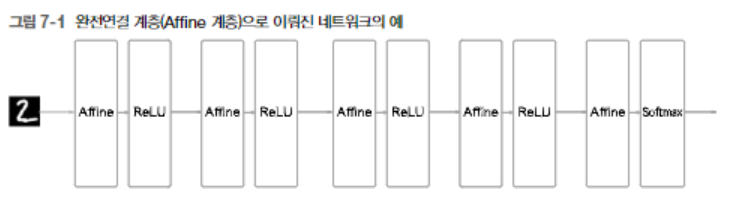

In [1]:
from IPython.display import Image
from urllib import request

url = "https://drive.google.com/file/d/1KcmG-8BexViWUnLG-E8pcGaTLSyhPErR/view?usp=sharing" #link 부분을 구글 드라이브에서 생성한 공유 링크로 변경해주면 된다.
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

res = request.urlopen(path).read()  #path값
img = Image(res, width='600', height='300') #이미지 크기 변경필요시 width 또는 height에 값을 입력

img

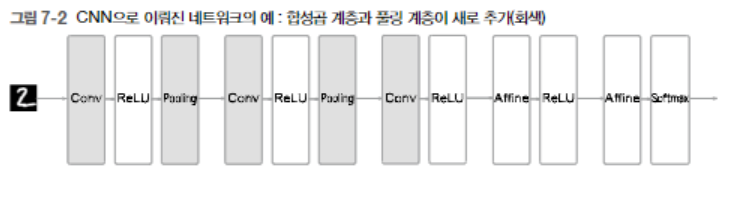

In [2]:
url = "https://drive.google.com/file/d/1xCyDP5A22dxFiQhcytIMdCoHPUKnTzDq/view?usp=sharing" #link 부분을 구글 드라이브에서 생성한 공유 링크로 변경해주면 된다.
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

res = request.urlopen(path).read()  #path값
img = Image(res, width='600', height='300') #이미지 크기 변경필요시 width 또는 height에 값을 입력

img

 - 합성곱계층(CONv) -> ReLu -> 풀링계층(Pooling)



**<합성곱계층>**

완전연결계층의 문제점때문에 생김.

-문제점

데이터의형상이 무시된다.
ex)이미지의 경우 3차원인데이터를
1차원데이터로 평탄화해주어야한다.
이럴경우, 3차원속에서 의미를 갖는 정보들이 무시된다.

-특징맵

합성곱계층의 입출력데이터를 뜻함.<br>


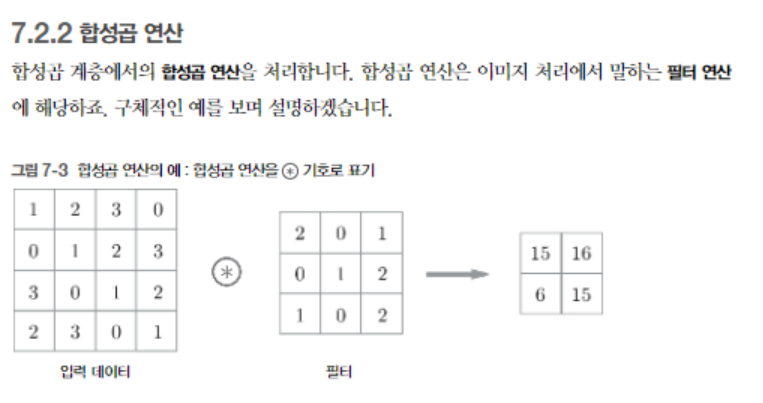

In [3]:
url = "https://drive.google.com/file/d/1xkEWa4woy6xejj7YyXXp3L5wDFqrhxrD/view?usp=sharing" #link 부분을 구글 드라이브에서 생성한 공유 링크로 변경해주면 된다.
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

res = request.urlopen(path).read()  #path값
img = Image(res, width='600', height='300') #이미지 크기 변경필요시 width 또는 height에 값을 입력

img

-합성곱연산<BR>
합성곱연산은 필터를 적용해서 특정 차원의 모양으로 바꾸는것.

여기서 필터의 값들이 완전연결신경망의 가중치에 해당!

편향도 존재하는데,
합성곱을 실시한후 마지막값에 더해준다.


-패딩<BR>
합성곱연산을 수행하기전에 입력데이터 주변을 특정값으로 채우는 것.
<BR>목적?<BR>
합성곱연산을 수행하면, 차원의크기가 계속줄어드는데, 그것을 방지하는 목적.


-스트라이드<BR>
필터의 이동크기를 조정.<BR>
목적?<BR>
1.출력크기조절<BR>
2.계산비용감소

**<풀링계층>**<BR>
세로,가로방향의 공간을 줄이는 연산


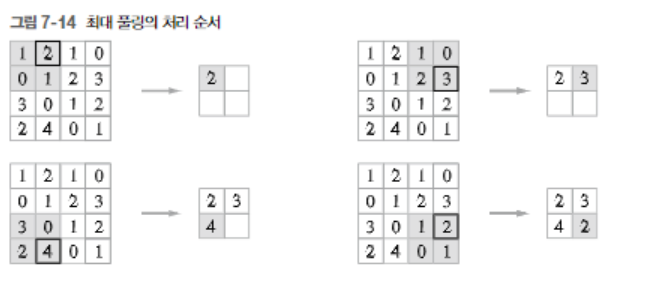

In [4]:
url = "https://drive.google.com/file/d/1S9pcwCbe9Jch3i9wLX4DKCPeIaK893zp/view?usp=sharing" #link 부분을 구글 드라이브에서 생성한 공유 링크로 변경해주면 된다.
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

res = request.urlopen(path).read()  #path값
img = Image(res, width='600', height='300') #이미지 크기 변경필요시 width 또는 height에 값을 입력

img

필터단위로 특정기준으로 값을 뽑아내는것.

EX) 최대풀링 : 최대값을 뽑아냄
+ 평균풀링 : 평균값 계산

풀링의특징(=목적)

1. 학습해 할 매개 변수가 없음.
합성곱계층처럼 매개변수를 통해 계산안해도됌. 평균,최대값만 뽑아내면되는것.

2. 채널수가 변하지 않는다.

3. 입력의 변화에 영향을 적게 받는다.
<BR> 입력데이터가 몇개변해도 무시할 수 있음.

In [5]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).

    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩

    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2 * pad - filter_h) // stride + 1
    out_w = (W + 2 * pad - filter_w) // stride + 1

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

**<파이썬구현>**


In [6]:
!pip install common

  Preparing metadata (setup.py) ... done
  Created wheel for common: filename=common-0.1.2-py3-none-any.whl size=3706 sha256=e16469f073a2ceb4dc6fdfc2851b64b82f69041b1738752e8f010c892c2e3110
  Stored in directory: /root/.cache/pip/wheels/c0/74/13/fe3274a9137054148c69e3f0424bd2fcf068ed25998047ecb5
Successfully built common


In [8]:
import sys,os
import numpy as np
sys.path.append(os.pardir)

x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1,5,5,stride=1,pad=0)
print(col1.shape)

x2 = np.random.rand(10,3,7,7)
col2 = im2col(x2,5,5,stride=1,pad=0)
print(col2.shape)

(9, 75)
(90, 75)


합성곱계층구현

In [9]:
import numpy as np

class Convolution:
    def __init__(self, filter_size):
        self.filter_size = filter_size
        self.filter = np.random.randn(filter_size, filter_size)  # 랜덤한 초기화

    def forward(self, input_data):
        self.input_data = input_data
        input_height, input_width = input_data.shape
        filter_height, filter_width = self.filter.shape

        output_height = input_height - filter_height + 1
        output_width = input_width - filter_width + 1

        output_data = np.zeros((output_height, output_width))

        for i in range(output_height):
            for j in range(output_width):
                region = input_data[i:i+filter_height, j:j+filter_width]
                output_data[i, j] = np.sum(region * self.filter)

        return output_data

풀링계층구현

In [10]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out


In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

ModuleNotFoundError: ignored

**<CNN종류>**

1. LeNet

CNN의 원조격임

활성화 함수 : 시그모이드

풀링 : 서브샘플링(단순히 원소를 줄이는 것)


2. AlexNet

최근에 발표된 주류 CNN

활성화 함수 : ReLU

풀링 : 최대 풀링

드롭아웃 사용


